In [1]:
import warnings

In [2]:
warnings.filterwarnings("default", category=DeprecationWarning, module="__main__")

In [3]:
%load_ext autoreload
%autoreload 2

import sys 
from os import getcwd, path
sys.path.append(path.dirname(getcwd()))
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
%matplotlib inline

In [4]:
from utils import data

In [5]:
from utils.paper import *

In [6]:
cohort = data.init_cohort(join_with="pdl1",
                          exclude_patient_ids=set(),
                          only_patients_with_bams=False)

inner join with pdl1: 29 to 29 rows
inner join with pdl1: 29 to 29 rows
{'dataframe_hash': 1361907583592967110,
 'provenance_file_summary': {u'cohorts': u'0.4.0+3.gda968fb',
                             u'isovar': u'0.0.6',
                             u'mhctools': u'0.3.0',
                             u'numpy': u'1.11.1',
                             u'pandas': u'0.18.1',
                             u'pyensembl': u'1.0.3',
                             u'scipy': u'0.18.1',
                             u'topiary': u'0.1.0',
                             u'varcode': u'0.5.10'}}


inner join with pdl1: 29 to 29 rows


PD-L1 IC2  False  True 
Response               
DCB            3      6
No DCB        16      4
Fisher's Exact Test: OR: 0.125, p-value=0.0316777675099 (two-sided)
{{{pdl1_ic2_vs_benefit_plot}}}
{{{pdl1_ic2_vs_benefit_benefit:67%}}}
{{{pdl1_ic2_vs_benefit_no_benefit:20%}}}
{{{pdl1_ic2_vs_benefit_fishers:n=29, Fisher's Exact p=0.032}}}


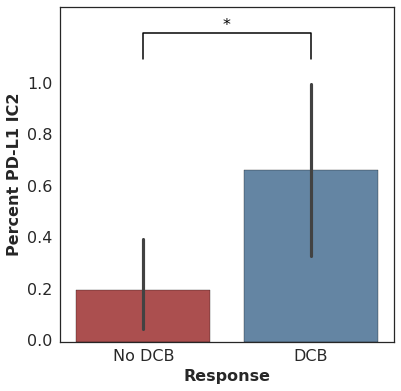

In [7]:
fishers_exact_hyper_label_printer(
    cohort.plot_benefit({"PD-L1 IC2": lambda row: row["IC Level"] == "IC2"}),
    label="pdl1_ic2_vs_benefit")

In [8]:
from scipy.stats import spearmanr

inner join with pdl1: 29 to 29 rows
{{{pdl1_any_vs_benefit_plot}}}
{{{pdl1_any_vs_benefit_spearmanr:n=29, Spearman rho=0.48 p=0.0083}}}


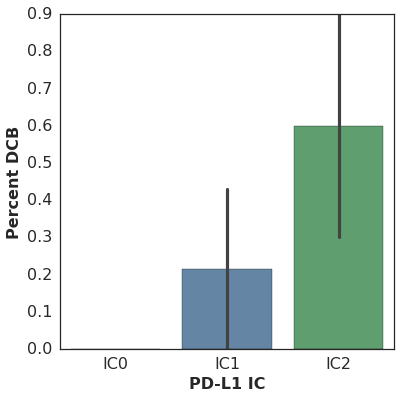

In [9]:
result = cohort.plot_correlation({"PD-L1 IC": lambda row: int(row["PD-L1"].split("IC")[1]),
                                    "Response": lambda row: row["benefit"]},
                                    plot_type="barplot",
                                    x_col="PD-L1 IC",
                                    stat_func=spearmanr)
result.plot.set_xticklabels(["IC0", "IC1", "IC2"])
result.plot.set_ylabel("Percent " + cohort.benefit_plot_name)
spearmanr_hyper_label_printer(result, label="pdl1_any_vs_benefit")

In [10]:
from cohorts.model import cohort_mean_bootstrap_auc

In [11]:
def pdl1(row):
    return int(row["PD-L1"].split("IC")[1])

In [12]:
cohort_mean_bootstrap_auc(cohort, pdl1)

inner join with pdl1: 29 to 29 rows


0.77547411346456419